# Lead Scoring Case Study

The Case Study aims to identify the most potential leads, also known as ‘Hot Leads’ which will impact on improving the lead conversion rate.

## Business Objective

We are required to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. In particular, we are given a ballpark of the target lead conversion rate to be around 80%.

# Step 1: Reading the data

In [1]:
# Importing Libraries & Files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Improving presentation aspect

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Improving HTML Display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Setting Pandas option
pd.set_option('display.max_columns',200)
pd.set_option('display.max_colwidth',255)
pd.set_option('display.max_info_columns',200)
pd.set_option('display.max_info_rows',200)
pd.set_option('display.width',200)
pd.set_option('display.html.border',1)

In [3]:
# In Order to run locally
df_data = pd.read_csv("Leads.csv")
df_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Overview of Dataframe (Shape, Datatype)
print(f'Shape of Data: {df_data.shape}', end="\n\n")
print('Information of Data')
print(f'{df_data.info()}', end="\n\n")

Shape of Data: (9240, 37)

Information of Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   Prospect ID                                    object 
 1   Lead Number                                    int64  
 2   Lead Origin                                    object 
 3   Lead Source                                    object 
 4   Do Not Email                                   object 
 5   Do Not Call                                    object 
 6   Converted                                      int64  
 7   TotalVisits                                    float64
 8   Total Time Spent on Website                    int64  
 9   Page Views Per Visit                           float64
 10  Last Activity                                  object 
 11  Country                                        object 
 12  S

In [5]:
#Overview of Dataframe (Description, % of NaN) 
print('Description of Data (Numeric column)')
print(f'{df_data.describe()}', end="\n\n")
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Description of Data (Numeric column)
         Lead Number    Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  Asymmetrique Activity Score  Asymmetrique Profile Score
count    9240.000000  9240.000000  9103.000000                  9240.000000           9103.000000                  5022.000000                 5022.000000
mean   617188.435606     0.385390     3.445238                   487.698268              2.362820                    14.306252                   16.344883
std     23405.995698     0.486714     4.854853                   548.021466              2.161418                     1.386694                    1.811395
min    579533.000000     0.000000     0.000000                     0.000000              0.000000                     7.000000                   11.000000
25%    596484.500000     0.000000     1.000000                    12.000000              1.000000                    14.000000                   15.000000
50%    615479.000000     0.000000

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# Step-2 Cleaning the data


In [6]:
# Dropping duplicate rows
df_data=df_data.drop_duplicates()

In [7]:
df_data.shape

(9240, 37)

In [8]:
# Replacing the value 'Select' with 'NaN' since 'Select' signifies that the person who filled the form did not selected any value
df_data = df_data.replace('Select', np.nan)
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Making list of un-usable columns, due to most NaN value (Taking an arbitrary value >20 %)
unnecessary_column = set((pd.isnull(df_data).sum()/len(df_data.index) > .2).index)

# Making list of un-necessary columns from Analysis point of view
unnecessary_column = {'Prospect ID', 'Lead Number'}

# Making list of numerical columns from Analysis point of view
numerical_column = {'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'}

# Making list of categorical columns from Analysis point of view
categorical_column = {'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                      'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                      'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'}

# Making list of Target/Output column from Analysis point of view
target_column = {'Converted'}

In [10]:
# Dropping un-usable and un-necessary columns
df_data = df_data[list(numerical_column | categorical_column | target_column)]

# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Percentage of null values per column


Newspaper                                   0.00
Lead Origin                                 0.00
Through Recommendations                     0.00
Converted                                   0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Magazine                                    0.00
Total Time Spent on Website                 0.00
A free copy of Mastering The Interview      0.00
TotalVisits                                 1.48
Page Views Per Visit                        1.48
Search                                      0.00
Newspaper Article                           0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Do Not Call                                 0.00
Last Notable Activity                       0.00
Do Not Email                                0.00
Digital Advertisement                       0.00
Last Activity                               1.11
X Education Forums  

In [11]:
# Further removing the columns which have very less variation in data
df_data[list(categorical_column)].describe()

,Newspaper,Lead Origin,Search,Newspaper Article,Receive More Updates About Our Courses,Through Recommendations,Update me on Supply Chain Content,Get updates on DM Content,Do Not Call,Last Notable Activity,Do Not Email,Digital Advertisement,I agree to pay the amount through cheque,Last Activity,X Education Forums,Magazine,Lead Source,A free copy of Mastering The Interview
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9137,9240,9240,9204,9240
unique,2,5,2,2,1,2,1,1,2,16,2,2,1,17,2,1,21,2
top,No,Landing Page Submission,No,No,No,No,No,No,No,Modified,No,No,No,Email Opened,No,No,Google,No
freq,9239,4886,9226,9238,9240,9233,9240,9240,9238,3407,8506,9236,9240,3437,9239,9240,2868,6352


In [12]:
# Adding columns with negligible or no variation to unnecessary_column and removing from Dataframe since they would not serve any purpose for our analysis

# 'Get updates on DM Content' since all rows have same value, i.e. 'No'
unnecessary_column.add('Get updates on DM Content')
categorical_column.remove('Get updates on DM Content')

# 'Newspaper Article' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Newspaper Article')
categorical_column.remove('Newspaper Article')

# 'Magazine' since all rows have same value, i.e. 'No'
unnecessary_column.add('Magazine')
categorical_column.remove('Magazine')

# 'I agree to pay the amount through cheque' since all rows have same value, i.e. 'No'
unnecessary_column.add('I agree to pay the amount through cheque')
categorical_column.remove('I agree to pay the amount through cheque')

# 'Receive More Updates About Our Courses' since all rows have same value, i.e. 'No'
unnecessary_column.add('Receive More Updates About Our Courses')
categorical_column.remove('Receive More Updates About Our Courses')

# 'Update me on Supply Chain Content' since all rows have same value, i.e. 'No'
unnecessary_column.add('Update me on Supply Chain Content')
categorical_column.remove('Update me on Supply Chain Content')

# 'Newspaper' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Newspaper')
categorical_column.remove('Newspaper')

# 'Through Recommendations' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Through Recommendations')
categorical_column.remove('Through Recommendations')

# 'Search' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Search')
categorical_column.remove('Search')

# 'Do Not Call' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Do Not Call')
categorical_column.remove('Do Not Call')

# 'Digital Advertisement' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('Digital Advertisement')
categorical_column.remove('Digital Advertisement')

# 'X Education Forums' since almost all rows have same value, i.e. 'No'
unnecessary_column.add('X Education Forums')
categorical_column.remove('X Education Forums')

# Dropping un-usable and un-necessary columns
df_data = df_data[list(numerical_column | categorical_column | target_column)]

# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)


Percentage of null values per column


TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Origin                               0.00
Last Notable Activity                     0.00
Do Not Email                              0.00
Converted                                 0.00
Last Activity                             1.11
A free copy of Mastering The Interview    0.00
Lead Source                               0.39
Total Time Spent on Website               0.00
dtype: float64

In [13]:
df_data.shape

(9240, 10)

In [14]:
# Dropping rows with most NaN value (Taking an arbitrary value >20 %)
threshold = int(.2*len(df_data.columns))
df_data.dropna(thresh=2, inplace=True)


In [15]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),5)

Percentage of null values per column


TotalVisits                               1.48268
Page Views Per Visit                      1.48268
Lead Origin                               0.00000
Last Notable Activity                     0.00000
Do Not Email                              0.00000
Converted                                 0.00000
Last Activity                             1.11472
A free copy of Mastering The Interview    0.00000
Lead Source                               0.38961
Total Time Spent on Website               0.00000
dtype: float64

In [16]:
# Observing Categorical Columns
df_data[list(categorical_column)].describe()

,Lead Origin,Last Notable Activity,Do Not Email,Last Activity,Lead Source,A free copy of Mastering The Interview
count,9240,9240,9240,9137,9204,9240
unique,5,16,2,17,21,2
top,Landing Page Submission,Modified,No,Email Opened,Google,No
freq,4886,3407,8506,3437,2868,6352


In [17]:
# 'Last Activity' have 1.33841 % 'NaN' values
# Imputing values for 'Last Activity'
# Replacing 'NaN' with 'Email Opened'
df_data[['Last Activity']]=df_data[['Last Activity']].fillna(value='Email Opened')

# 'Lead Source' have 0.34116 % 'NaN' values
# Imputing values for 'Lead Source'
# Replacing 'NaN' with 'Google'
df_data[['Lead Source']]=df_data[['Lead Source']].fillna(value='Google')

In [18]:
# Observing Numeric Columns
df_data[list(numerical_column)].describe()

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
count,9103.000000,9103.000000,9240.000000
mean,3.445238,2.362820,487.698268
std,4.854853,2.161418,548.021466
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,12.000000
50%,3.000000,2.000000,248.000000
75%,5.000000,3.000000,936.000000
max,251.000000,55.000000,2272.000000


In [19]:
# Imputing 'Page Views Per Visit','TotalVisits' with Mean, since the amount of missing data is less (< 2%) and variation in data is low.
df_data[['Page Views Per Visit']]=df_data[['Page Views Per Visit']].fillna(value=df_data[['Page Views Per Visit']].mean())
df_data[['TotalVisits']]=df_data[['TotalVisits']].fillna(value=df_data[['TotalVisits']].mean())

In [20]:
# Getting % of NaN values in new Dataframe
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),5)

Percentage of null values per column


TotalVisits                               0.0
Page Views Per Visit                      0.0
Lead Origin                               0.0
Last Notable Activity                     0.0
Do Not Email                              0.0
Converted                                 0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Lead Source                               0.0
Total Time Spent on Website               0.0
dtype: float64

In [21]:
# Shape of new Dataframe
print(f'Shape of Data: {df_data.shape}', end="\n\n")

Shape of Data: (9240, 10)



# Step:3 Exploratory Data Analysis

#### Part A

In [22]:
def num_col_univariate_analysis(c):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(y=c, data=df_data)
  plt.show()

In [23]:
def cat_col_univariate_analysis(c):
  sns.catplot(y=c, data=df_data, kind="count")
  plt.show()

In [24]:
def num_col_bivariate_analysis(c1,c2):
  plt.figure(figsize=(4, 4))
  ax = sns.boxplot(x=c1, y=c2, data=df_data)
  plt.show()

In [25]:
def cat_col_bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df_data, kind="count")
  plt.show()

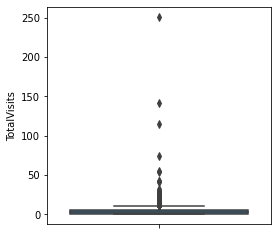

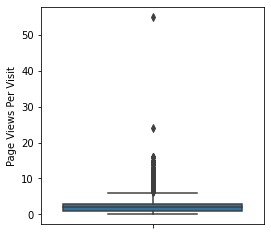

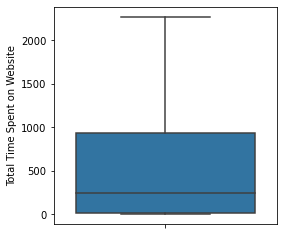

In [26]:
# Univariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_univariate_analysis(c)

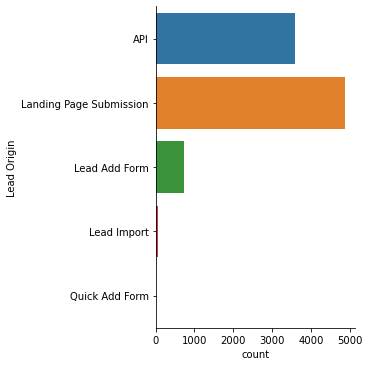

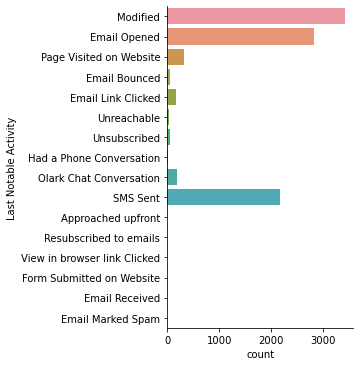

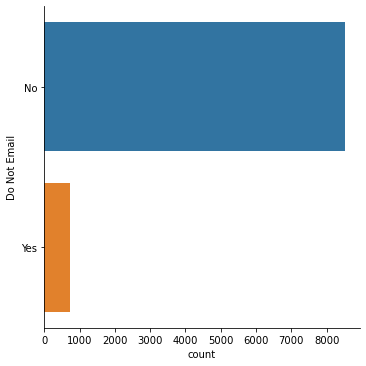

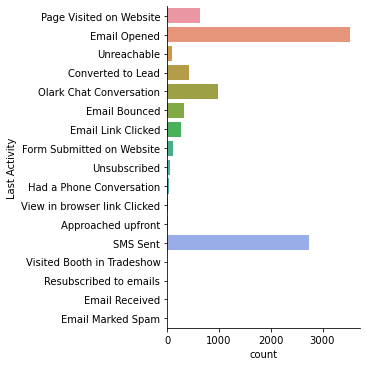

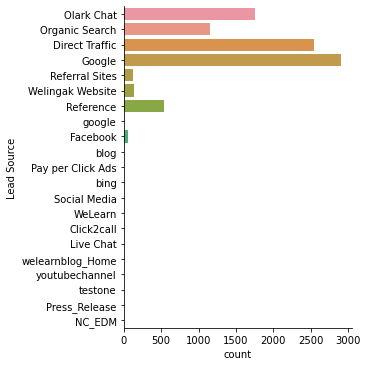

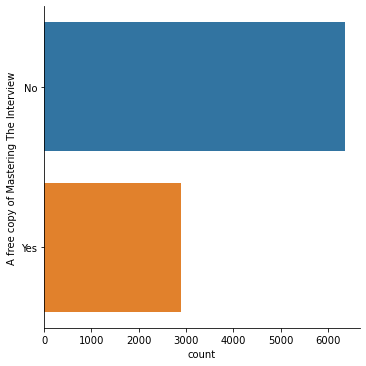

In [27]:
# Univariate Analysis of Numerical Columns
for c in categorical_column:
  cat_col_univariate_analysis(c)

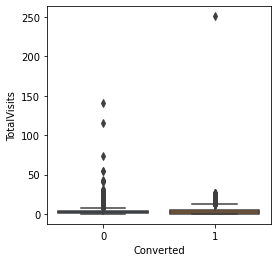

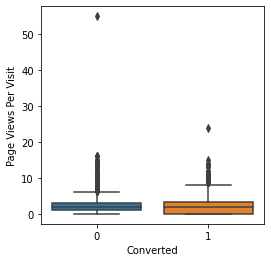

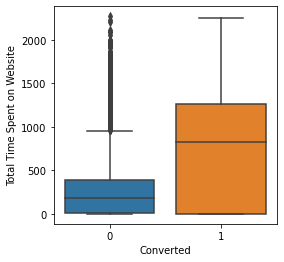

In [28]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
  num_col_bivariate_analysis('Converted',c)

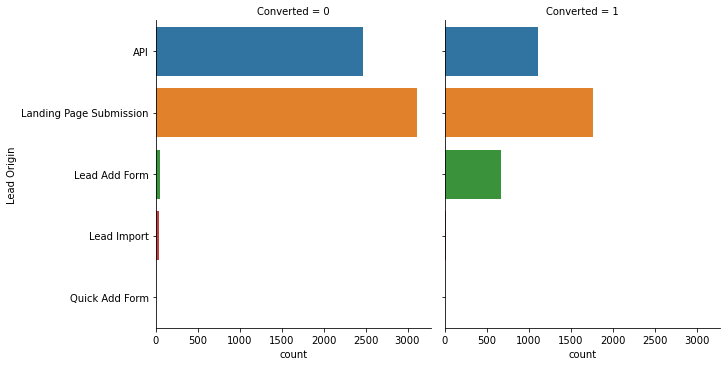

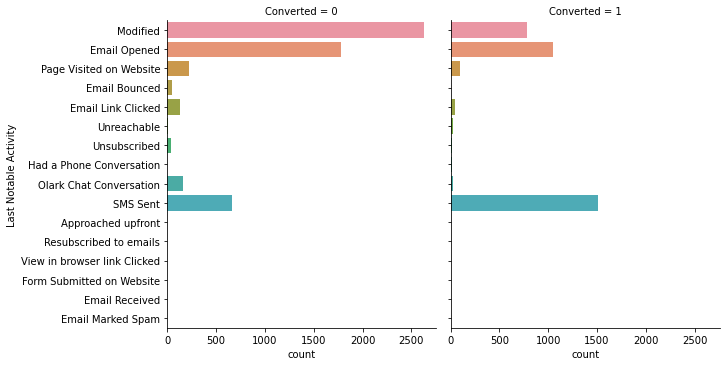

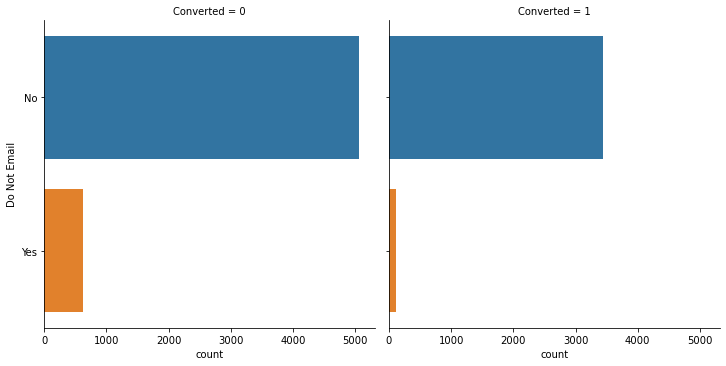

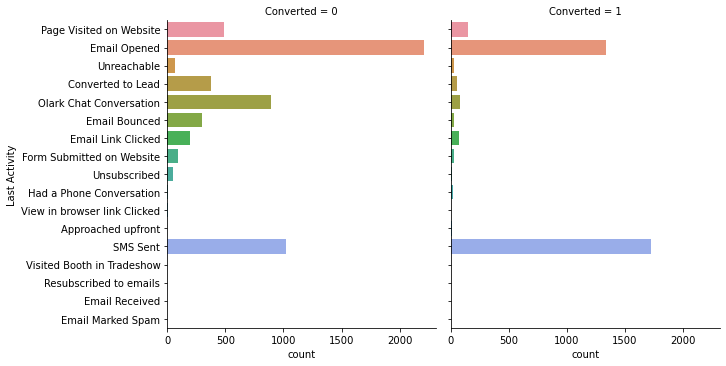

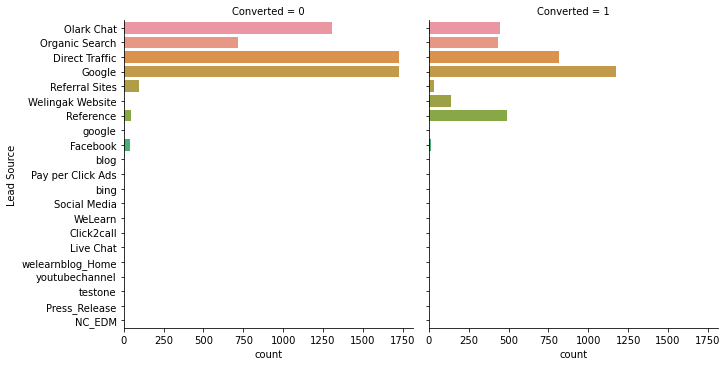

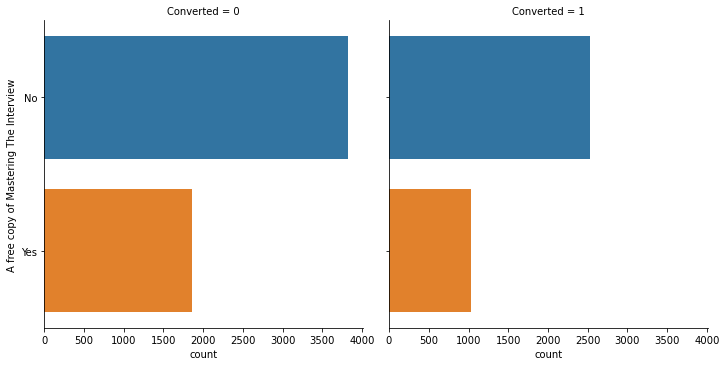

In [29]:
# Bivariate Analysis of Categorical Columns
for c in categorical_column:
  cat_col_bivariate_analysis('Converted',c)

<AxesSubplot:>

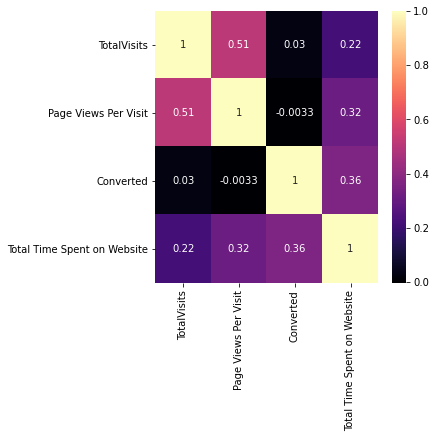

In [30]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(5, 5))
sns.heatmap(df_data.corr(), cmap="magma",annot=True)


##### Summary: Refereing the EDA Part A, we conclude the following points:

1. Univariate Analysis Conclusion:

 - There is low variation in Page Views Per Visit and TotalVisits but higher variation in Total Time Spent on Website
 - There are a lot of outliers in Page Views Per Visit and TotalVisits which needs to be treated before modelling

2. Bivariate Analysis Conclusion:

 - There is positive correlation between Total Time Spent on Website and Conversion
 - There is come correlation between Conversion and some categorical columns like Lead Origin and Lead Source

3. Correlation Analysis (Heatmap) Conclusion:

 - There is positive correlation between Total Time Spent on Website and Conversion
 - There is almost no correlation in Page Views Per Visit and TotalVisits with Conversion

## Creating Dummy variables


In [31]:
# Listing out columns for creating dummy variables
df_data[list(categorical_column)].describe()

,Lead Origin,Last Notable Activity,Do Not Email,Last Activity,Lead Source,A free copy of Mastering The Interview
count,9240,9240,9240,9240,9240,9240
unique,5,16,2,17,21,2
top,Landing Page Submission,Modified,No,Email Opened,Google,No
freq,4886,3407,8506,3540,2904,6352


In [32]:
# Creating dummy varaiables and drop_first to avoid multicollinearity
df_data = pd.get_dummies(data=df_data, columns=list(categorical_column), drop_first=True)
del categorical_column
df_data_usable_columns = set(df_data.columns)

In [33]:
# Overview of Dataframe (Shape, Datatype)
print(f'Shape of Data: {df_data.shape}', end="\n\n")
print('Information of Data')
print(f'{df_data.info()}', end="\n\n")
# Overview of Dataframe (Description, % of NaN) 
print('Description of Data')
print(f'{df_data.describe()}', end="\n\n")
print('Percentage of null values per column')
round(100*(df_data.isnull().sum()/len(df_data.index)),2)

Shape of Data: (9240, 61)

Information of Data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   TotalVisits                                         float64
 1   Page Views Per Visit                                float64
 2   Converted                                           int64  
 3   Total Time Spent on Website                         int64  
 4   Lead Origin_Landing Page Submission                 uint8  
 5   Lead Origin_Lead Add Form                           uint8  
 6   Lead Origin_Lead Import                             uint8  
 7   Lead Origin_Quick Add Form                          uint8  
 8   Last Notable Activity_Email Bounced                 uint8  
 9   Last Notable Activity_Email Link Clicked            uint8  
 10  Last Notable Activity_Email Marked Spam             uint8  
 

TotalVisits                                   0.0
Page Views Per Visit                          0.0
Converted                                     0.0
Total Time Spent on Website                   0.0
Lead Origin_Landing Page Submission           0.0
                                             ... 
Lead Source_google                            0.0
Lead Source_testone                           0.0
Lead Source_welearnblog_Home                  0.0
Lead Source_youtubechannel                    0.0
A free copy of Mastering The Interview_Yes    0.0
Length: 61, dtype: float64

#### Part B


In [34]:
def bivariate_analysis(c1,c2):
  sns.catplot(col=c1 ,y=c2, data=df_data, kind="count", height=2)
  plt.show()

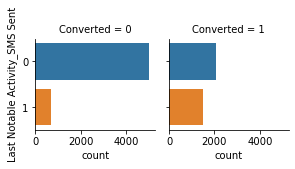

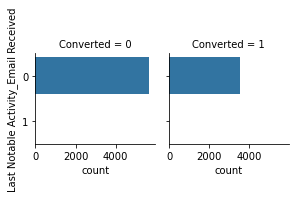

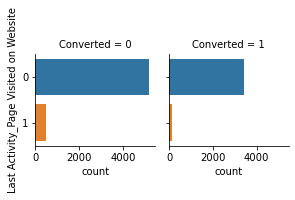

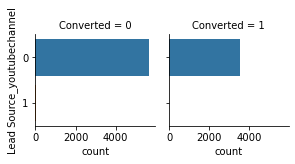

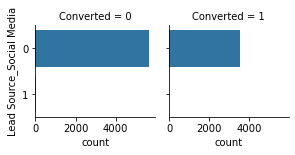

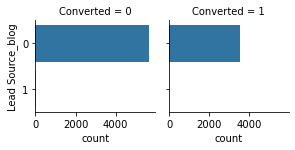

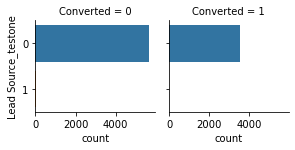

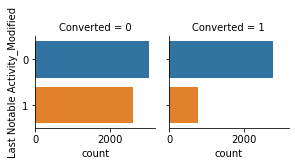

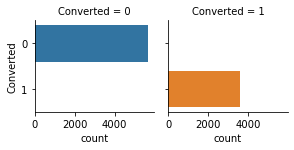

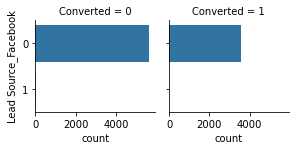

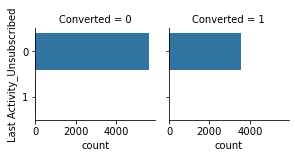

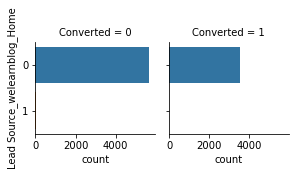

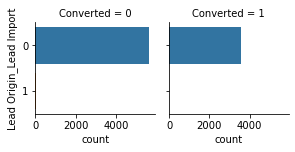

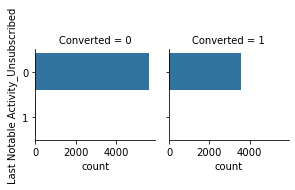

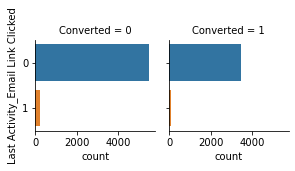

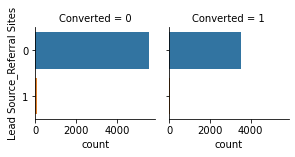

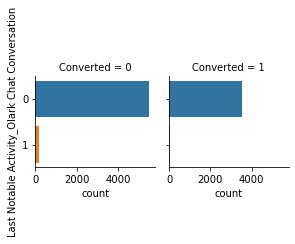

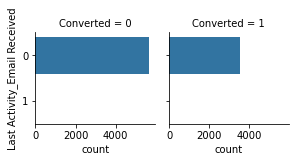

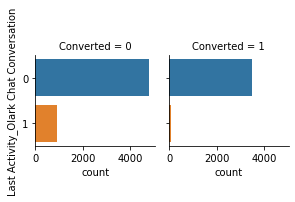

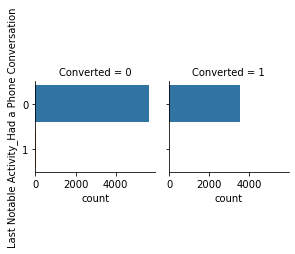

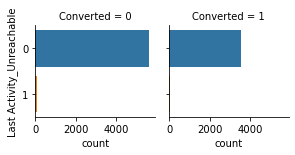

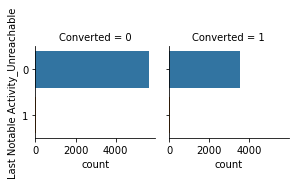

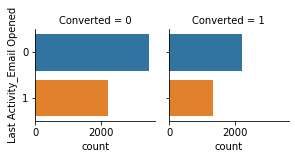

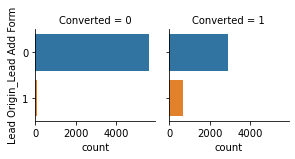

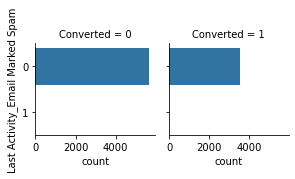

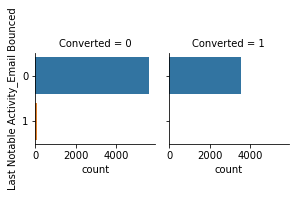

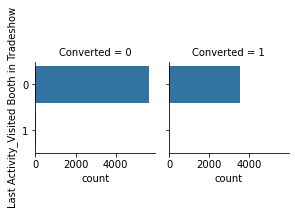

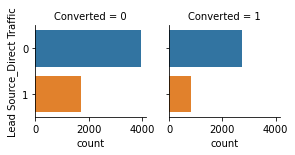

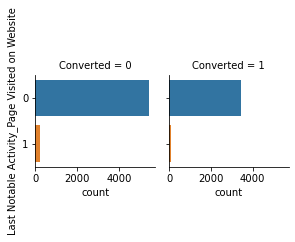

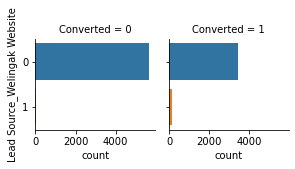

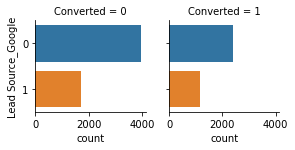

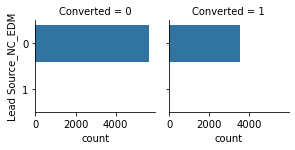

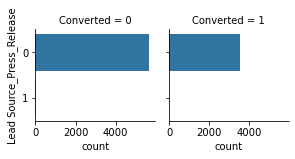

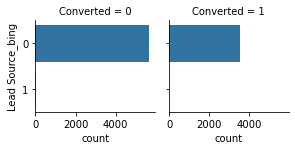

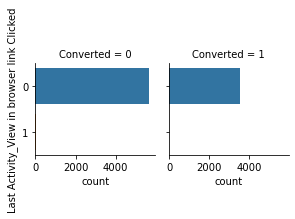

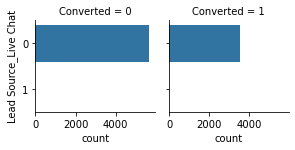

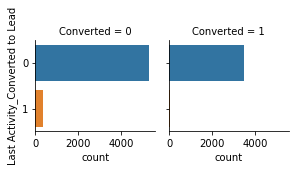

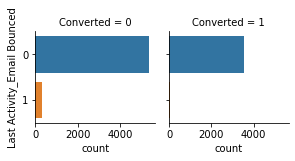

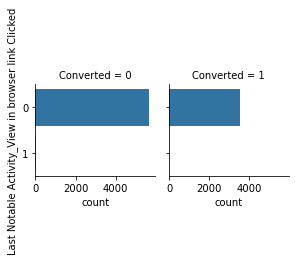

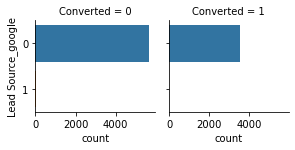

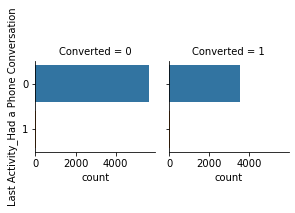

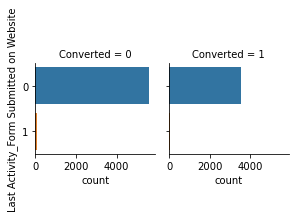

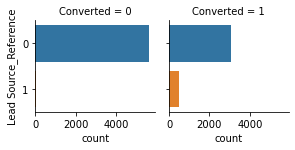

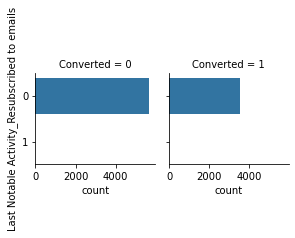

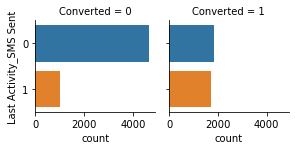

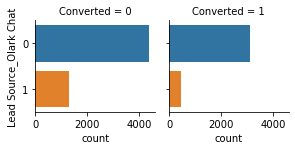

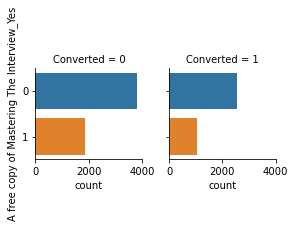

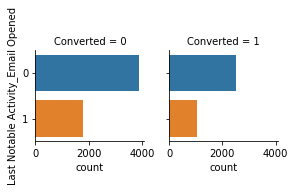

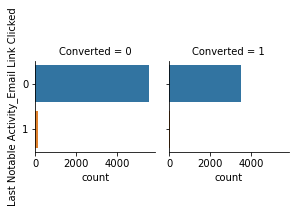

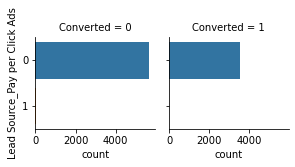

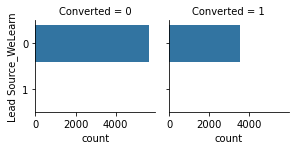

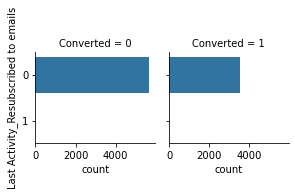

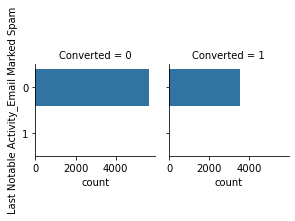

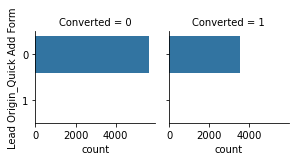

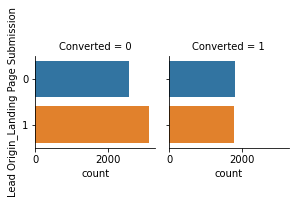

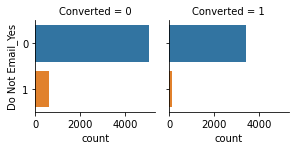

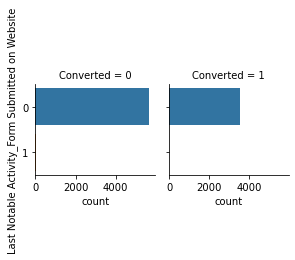

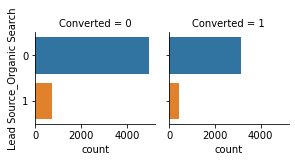

In [35]:
for c in df_data_usable_columns - numerical_column:
    bivariate_analysis('Converted',c)

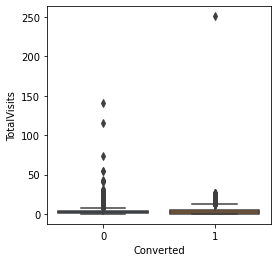

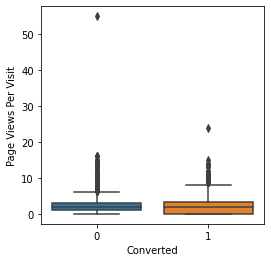

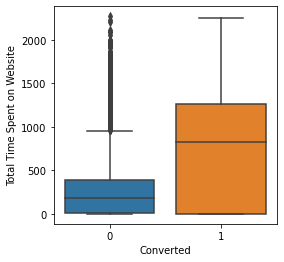

In [36]:
# Bivariate Analysis of Numerical Columns
for c in numerical_column:
    num_col_bivariate_analysis('Converted',c)

<AxesSubplot:>

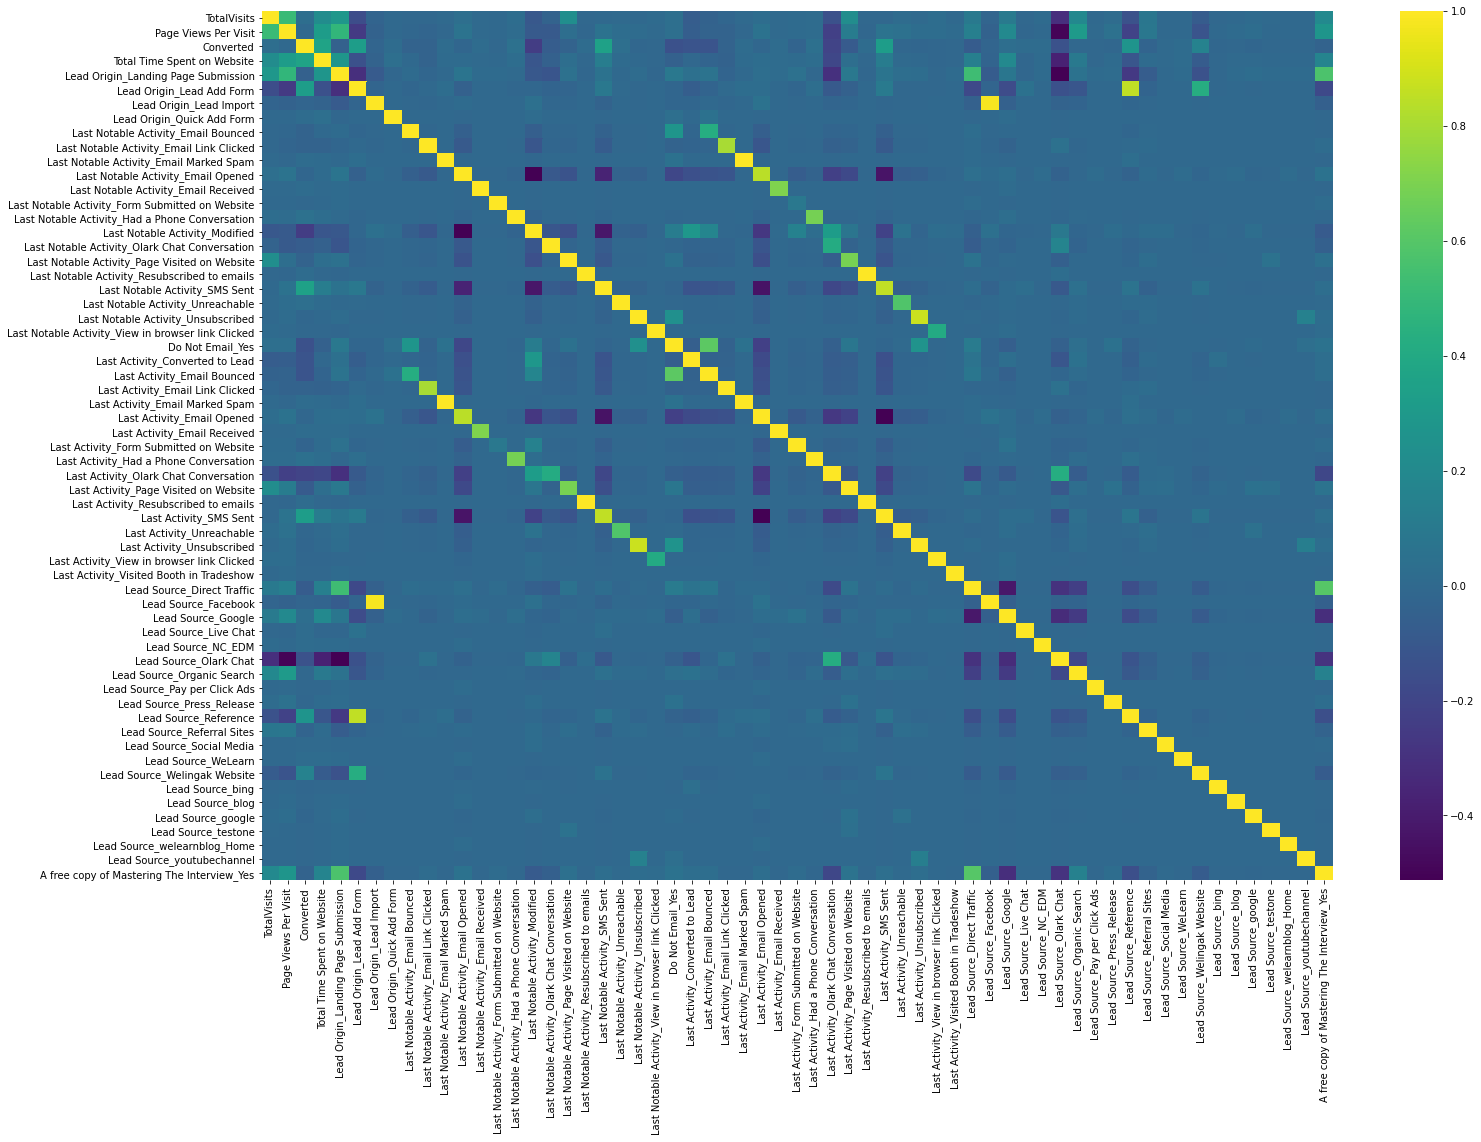

In [37]:
# Visualizing the correlation between all set of usable columns
plt.figure(figsize=(24, 16))
sns.heatmap(df_data.corr(), cmap="viridis")

##### EDA Part B, we conclude the following points:

- Bivariate Analysis Conclusion: The following dummy variables seems to have some effect on Conversion:

     Lead Origin_Lead Add Form

     Last Activity_Email Bounced

     Lead Source_Reference

     Total Time Spent on Website

- Correlation Analysis (Heatmap) Conclusion: The heatmap is not very clear due to huge number of columns, however, we do see a lot of correlation amongst columns, especially dummy variables. Hence we would further reduce the number of columns so as to reluce multicollinearity.

In [38]:
# Conversion Rate for past orders
round(len(df_data[df_data['Converted']==1].index)/len(df_data.index)*100,2)

38.54

## Outlier Treatment


In [39]:
# Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 
# Checking if outliers exist
z = np.abs(stats.zscore(df_data))
# Outlier Records
df_data_outliers = df_data[(z > 3).any(axis=1)]
# Outlier Removed Records
df_data_non_outliers = df_data[(z < 3).all(axis=1)]
df_data_non_outliers.head()

,TotalVisits,Page Views Per Visit,Converted,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,A free copy of Mastering The Interview_Yes
1,5.0,2.5,0,674,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,2.0,1,1532,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2.0,2.0,1,1640,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Feature Standardization / Normalization


In [40]:
# Normalising continuous features (numerical columns)
df = df_data_non_outliers[list(numerical_column)]
normalized_df=(df-df.mean())/df.std()
df_data_non_outliers.drop(columns=numerical_column,axis=1,inplace=True)
df_data_normal_non_outliers = pd.concat([df_data_non_outliers,normalized_df],axis=1)

print(f'Percentage of data retained: {100*(df_data_normal_non_outliers.shape[0]/df_data.shape[0]):.2}')
df_data_normal_non_outliers.head()

Percentage of data retained: 6.5e+01


,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,A free copy of Mastering The Interview_Yes,TotalVisits,Page Views Per Visit,Total Time Spent on Website
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.621490,0.046638,0.264746
2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.467274,-0.224659,1.796143
5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.193117,-1.309847,-0.938240
6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.467274,-0.224659,1.988906
7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.193117,-1.309847,-0.938240


### Splitting Data into Training and Test Sets


In [41]:
# Putting feature variable to X
X = df_data_normal_non_outliers.drop(['Converted'],axis=1)
# Putting response variable to y
y = df_data_normal_non_outliers['Converted']

y.head()

1    0
2    1
5    0
6    1
7    0
Name: Converted, dtype: int64

In [42]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3)

# Step:4 Building Model

We will use Logistic Regression with RFE in order to build two suitable models as follows:

### Building Model : Feature Selection using RFE for Logistic Regression


In [43]:
# Running RFE with the output number of the variable equal to 25
logreg = LogisticRegression(C=1e-5,max_iter=50)
rfe = RFE(logreg, 25) 
rfe = rfe.fit(X,y)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)

[ True False False False  True  True  True  True False  True False  True
 False False False  True False False False False False False False  True
  True False False False  True False False  True False  True  True  True
  True  True  True False  True  True  True False False False False False
 False False False False False False False False  True  True  True  True]


In [44]:
# Ranking of columns w.r.t ranking
print(rfe.ranking_)

[ 1  4  3  2  1  1  1  1  5  1  6  1  9 11 13  1 16 18 20 22 24 26 28  1
  1 34 32 33  1 36 35  1 31  1  1  1  1  1  1  7  1  1  1  8 10 12 14 15
 17 19 21 23 25 27 29 30  1  1  1  1]


In [45]:
# Listing out the top 25 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['Lead Origin_Landing Page Submission', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Form Submitted on Website', 'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent', 'Last Activity_Unsubscribed', 'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'A free copy of Mastering The Interview_Yes', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website'],
      dtype='object')

In [62]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
def build_lr_model(col):
    print(f'Columns Count : {len(col)}')
    print(f'Columns : {col}')
    print('='*78)
    
    
    # Running the model using the selected variables
    X_train_sm = sm.add_constant(X_train[col])
    logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm4.fit()
    print(res.summary())
  
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif, end='\n'+'='*78+'\n')
  
    # Getting the predicted values on the train set
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
  
    # Creating a dataframe with the actual churn flag and the predicted probabilities
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
    y_train_pred_final['Lead_ID'] = y_train.index
    y_train_pred_final.head()
  
    # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
    y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  
    # Let's check the overall accuracy.
    print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
    print('='*78)
   
    # Let's take a look at the confusion matrix again 
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
    draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
    
    
def build_lr_model_advanced(col):
    print(f'Columns : {col}')
    print('='*78)
  
    # Running the model using the selected variables
    X_train_sm = sm.add_constant(X_train[col])
    logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm4.fit()
    print(res.summary())
  
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    print(f'Computing VIF values to keep track of multicollinearity')
    print('='*78)
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif, end='\n'+'='*78+'\n')
  
    # Getting the predicted values on the train set
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
  
    # Creating a dataframe with the actual churn flag and the predicted probabilities
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
    y_train_pred_final['Lead_ID'] = y_train.index
    y_train_pred_final.head()
  
    # Creating new column 'predicted' with 1 if Conversion_Probability > 0.5 else 0
    y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
  
    # Let's check the overall accuracy.
    print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
    print('='*78)
   
    # Let's take a look at the confusion matrix again 
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
    draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
  
    #  Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
        
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
        
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()
  
    # Ask for user input based on curve, for the cut-off value
    # cutoff = float(input('What should be the cut-off based on above plot (example 0.5)?'))
    print('Taking cut-off value as 0.35, from the plot above')
    cutoff = 0.35 # Taking value after observing graph
  
    y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > cutoff else 0)
  
    # Let's check the updated accuracy.
    print(f'Overall accuracy: {metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)}')
    print('='*78)
  
    # Let's check the Precision Score.
    print(f'Precision Score: {precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
    print('='*78)
  
    # Let's check the Recall Score.
    print(f'Recall Score: {recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)}')
    print('='*78)
  
    # Let's plot Precision-Recall Curve
    p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)
    plt.plot(thresholds, p[:-1], "g-")
    plt.plot(thresholds, r[:-1], "r-")
    plt.show()
    # Ask for user input based on curve, for the cut-off value
    # cutoff = float(input('What should be the cut-off based on above plot (x-axis of intersection, generally)?'))
    print('Taking cut-off value as 0.42, from the plot above')
    cutoff = 0.42 # Taking value after observing graph
  
    # Making Prediction of Test Set
    X_test_sm = sm.add_constant(X_test[col])
    y_test_pred = res.predict(X_test_sm)
    y_pred_1 = pd.DataFrame(y_test_pred)
    # Converting y_test to dataframe
    y_test_df = pd.DataFrame(y_test)
    # Removing index for both dataframes to append them side by side 
    y_pred_1.reset_index(drop=True, inplace=True)
    y_test_df.reset_index(drop=True, inplace=True)
    # Appending y_test_df and y_pred_1
    y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
    # print(y_pred_final)
    # Renaming the column 
    y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Probability'})
    # Rearranging the columns
  #  y_pred_final = y_pred_final.reindex_axis(['Lead_ID','Converted','Conversion_Probability'], axis=1)
    y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > cutoff else 0)
  
    # Let's check the overall accuracy on Test set
    print(f'Overall accuracy on Test set: {metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)}')
    print('='*78)
    
    confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
    confusion2
    TP = confusion2[1,1] # true positive 
    TN = confusion2[0,0] # true negatives
    FP = confusion2[0,1] # false positives
    FN = confusion2[1,0] # false negatives
    # Let's see the sensitivity of our logistic regression model
    print(f'sensitivity of our logistic regression model: {TP / float(TP+FN)}')
    print('='*78)
    # Let's see the specificity of our logistic regression model
    print(f'specificity of our logistic regression model: {TN / float(TN+FP)}')
    print('='*78)

### Building Model using Logistic Regression

Columns Count : 25
Columns : ['Lead Source_NC_EDM', 'Last Notable Activity_SMS Sent', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Modified', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'Last Activity_SMS Sent', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Direct Traffic', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website', 'Lead Source_Google', 'Lead Source_Organic Search']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Obs

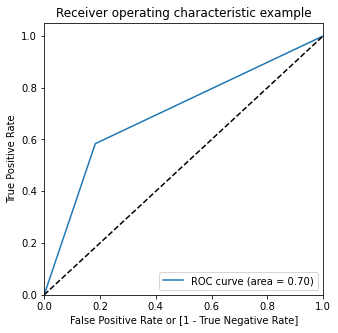

In [63]:
# MODEL 1
# Let's consider all 25 the columns suggested by RFE for our next model
selected_predictors = set(auto_selected_predictors)
removed_predictors = set()
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 25
Columns : ['Lead Source_NC_EDM', 'Last Notable Activity_SMS Sent', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Modified', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'Last Activity_SMS Sent', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Direct Traffic', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website', 'Lead Source_Google', 'Lead Source_Organic Search']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Obs

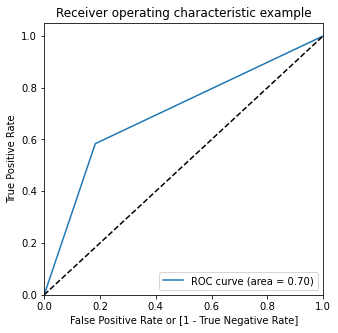

In [64]:
# MODEL 2
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Resubscribed to emails')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 24
Columns : ['Lead Source_NC_EDM', 'Last Notable Activity_SMS Sent', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Modified', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'Last Activity_SMS Sent', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website', 'Lead Source_Google', 'Lead Source_Organic Search']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 418

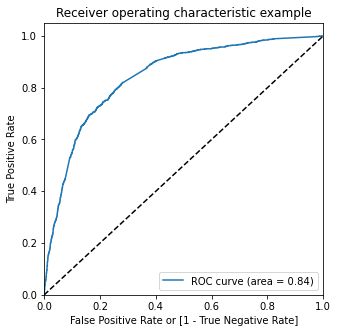

In [65]:
# MODEL 3
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Direct Traffic')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 23
Columns : ['Lead Source_NC_EDM', 'Last Notable Activity_SMS Sent', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Modified', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'Last Activity_SMS Sent', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website', 'Lead Source_Google']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                      

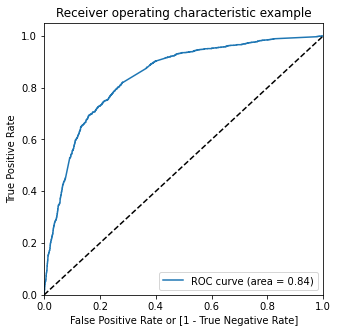

In [66]:
# MODEL 4
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Organic Search')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 22
Columns : ['Lead Source_NC_EDM', 'Last Notable Activity_SMS Sent', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Modified', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'Last Activity_SMS Sent', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website', 'Lead Source_Google']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:             

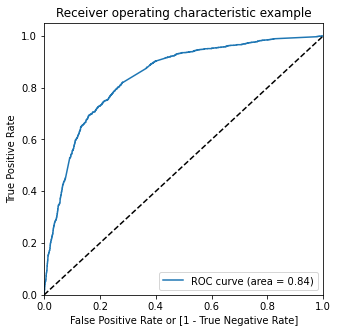

In [67]:
# MODEL 5
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Email Opened')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 22
Columns : ['Lead Source_NC_EDM', 'Last Notable Activity_SMS Sent', 'Last Activity_View in browser link Clicked', 'Last Notable Activity_Modified', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'Last Activity_SMS Sent', 'Lead Source_Olark Chat', 'Total Time Spent on Website', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website', 'Lead Source_Google']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:             

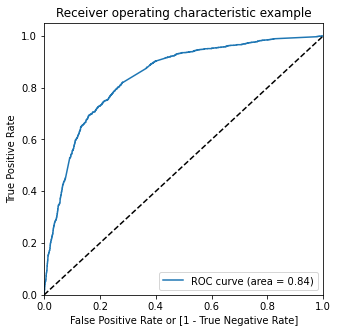

In [68]:
# MODEL 6
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Lead Source_Welingak Website')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 22
Columns : ['Last Notable Activity_SMS Sent', 'Last Notable Activity_Modified', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'Last Activity_Email Opened', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Google', 'Lead Source_NC_EDM', 'Last Activity_View in browser link Clicked', 'Total Time Spent on Website', 'Lead Source_Olark Chat', 'Last Activity_SMS Sent', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:             

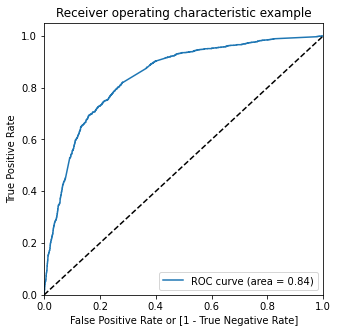

In [69]:
# MODEL 7
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Page Visited on Website')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 21
Columns : ['Last Notable Activity_SMS Sent', 'Last Notable Activity_Modified', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'Last Activity_Email Opened', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Google', 'Lead Source_NC_EDM', 'Last Activity_View in browser link Clicked', 'Total Time Spent on Website', 'Lead Source_Olark Chat', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4169
Model Family:

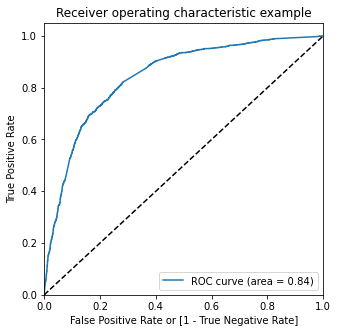

In [70]:
# MODEL 8
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_SMS Sent')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 21
Columns : ['Last Notable Activity_SMS Sent', 'Last Notable Activity_Modified', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'Last Activity_Email Opened', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Google', 'Lead Source_NC_EDM', 'Last Activity_View in browser link Clicked', 'Total Time Spent on Website', 'Lead Source_Olark Chat', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4169
Model Family:

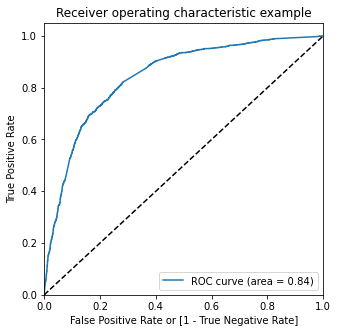

In [71]:
# MODEL 9
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_View in browser link Clicked')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 20
Columns : ['Last Notable Activity_SMS Sent', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'Last Activity_Email Opened', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Google', 'Lead Source_NC_EDM', 'Last Activity_View in browser link Clicked', 'Total Time Spent on Website', 'Lead Source_Olark Chat', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4170
Model Family:                Binomial   Df Mode

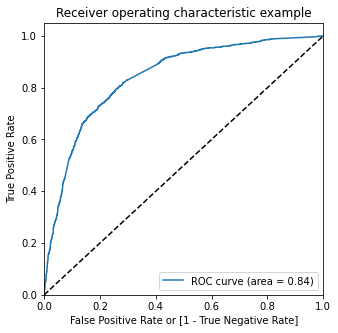

In [72]:
# MODEL 10
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Modified')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 19
Columns : ['Last Notable Activity_SMS Sent', 'Lead Source_Facebook', 'Last Activity_Unsubscribed', 'TotalVisits', 'Last Activity_Olark Chat Conversation', 'Page Views Per Visit', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Google', 'Lead Source_NC_EDM', 'Last Activity_View in browser link Clicked', 'Total Time Spent on Website', 'Lead Source_Olark Chat', 'A free copy of Mastering The Interview_Yes', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Marked Spam', 'Lead Origin_Landing Page Submission', 'Last Notable Activity_Form Submitted on Website']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4171
Model Family:                Binomial   Df Model:                            

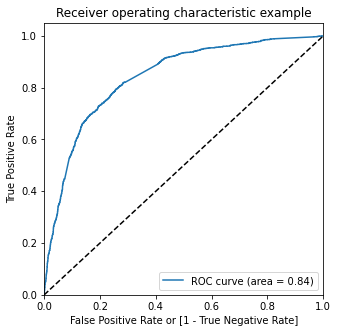

In [73]:
# MODEL 11
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Email Opened')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 18
Columns : ['TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_SMS Sent', 'Page Views Per Visit', 'Lead Source_NC_EDM', 'Last Notable Activity_Email Link Clicked', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradeshow', 'Last Notable Activity_Email Marked Spam', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Facebook', 'Lead Origin_Landing Page Submission', 'Last Activity_Unsubscribed', 'Last Notable Activity_Form Submitted on Website', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Total Time Spent on Website']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4172
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scal

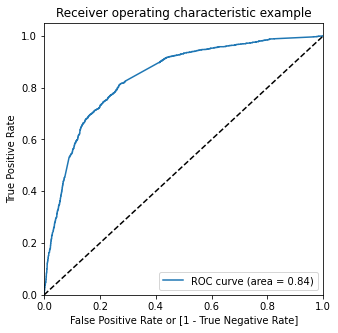

In [74]:
# MODEL 12
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('A free copy of Mastering The Interview_Yes')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 17
Columns : ['TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_SMS Sent', 'Page Views Per Visit', 'Lead Source_NC_EDM', 'Last Notable Activity_Email Link Clicked', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Facebook', 'Lead Origin_Landing Page Submission', 'Last Activity_Unsubscribed', 'Last Notable Activity_Form Submitted on Website', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Total Time Spent on Website']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4172
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method: 

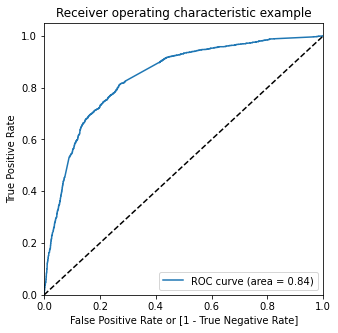

In [75]:
# MODEL 13
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Notable Activity_Email Marked Spam')
build_lr_model(list(selected_predictors-removed_predictors))

Columns Count : 17
Columns : ['TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_SMS Sent', 'Page Views Per Visit', 'Lead Source_NC_EDM', 'Last Notable Activity_Email Link Clicked', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Facebook', 'Lead Origin_Landing Page Submission', 'Last Activity_Unsubscribed', 'Last Notable Activity_Form Submitted on Website', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Total Time Spent on Website']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4172
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method: 

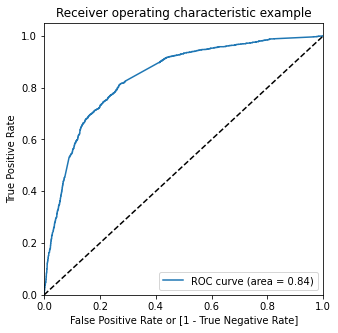

In [76]:
# MODEL 14
# Let's consider new set of columns suggested by RFE - removed columns for our next model
removed_predictors.add('Last Activity_Had a Phone Conversation')
build_lr_model(list(selected_predictors-removed_predictors))

### VIF as well as accuracy looks fine, thus computing more metrics for this model.



# Step: 5 Final Model Building and Analysis


Columns : ['TotalVisits', 'Last Activity_Olark Chat Conversation', 'Last Notable Activity_SMS Sent', 'Page Views Per Visit', 'Lead Source_NC_EDM', 'Last Notable Activity_Email Link Clicked', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradeshow', 'Last Activity_Email Marked Spam', 'Last Notable Activity_Email Bounced', 'Lead Source_Facebook', 'Lead Origin_Landing Page Submission', 'Last Activity_Unsubscribed', 'Last Notable Activity_Form Submitted on Website', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Total Time Spent on Website']
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 4181
Model:                            GLM   Df Residuals:                     4172
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                    

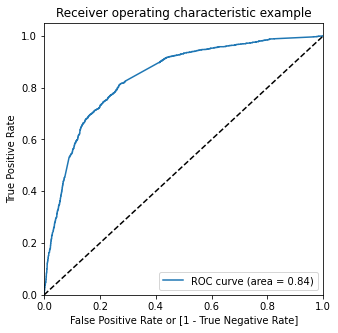

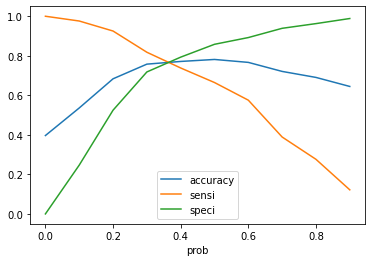

Taking cut-off value as 0.35, from the plot above
Overall accuracy: 0.7624970102846209
Precision Score: 0.7547945205479452
Recall Score: 0.6646562123039808


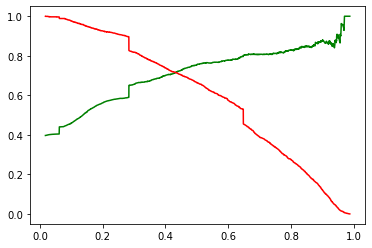

Taking cut-off value as 0.42, from the plot above
Overall accuracy on Test set: 0.7723214285714286
sensitivity of our logistic regression model: 0.7174211248285323
specificity of our logistic regression model: 0.8099717779868297


In [77]:
# Building model again, and obtaining additional parameters like cut-off
# Making predictions on Test set using this final model
build_lr_model_advanced(list(selected_predictors-removed_predictors))

In [ ]:
# Analysis of columns in our final model w.r.t. 'Converted'
col = list(selected_predictors-removed_predictors)
col.append('Converted')
plt.figure(figsize=(15, 8))
sns.heatmap(df_data_normal_non_outliers[col].corr(), cmap="YlGnBu",annot=True)                                                   

## Final Model Summary:

1. Overall accuracy on Test set: 0.786
2. sensitivity of our logistic regression model: 0.733
3. specificity of our logistic regression model: 0.823
4. Top 3 variables in model, that contribute towards lead conversion are: 
    a. Total Time Spent on Website
    b. Last Notable Activity_SMS Sent
    c. TotalVisits
5. Top 3 variables in my model, that should be focused are:
    a. Last Activity_SMS Sent (positively impacting)
    b. Last Activity_Olark Chat Conversation (negatively impacting)
    c. Lead Source_Olark Chat (negatively impacting)

### Verifying if sufficient accuracy is achieved using Logistic Regression

Building Model Using PCA to Verify Model Accuracy


In [ ]:
#Initializing the PCA module
pca = PCA(svd_solver='randomized', random_state=100)

In [ ]:
#Doing the PCA on the train data
pca.fit(df_data_normal_non_outliers)

In [ ]:

#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (15,5))
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

fig = plt.figure(figsize = (15,5))
ax = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components (zoomed in 1 to 14)')
plt.ylabel('cumulative explained variance')
plt.grid(color='b', linestyle='-', linewidth=.5)
plt.xlim(1,15)
plt.show()

### Performing PCA (Moderate Accuracy) with 75% Variance Cut-off


#### USE CASE: This could help us identify larger number of probable hot leads and thus we can focus on larger audience, if we have bigger team to contact to hot leads individually on telephone calls

In [ ]:
X_train.shape

In [ ]:
# Since our dataset is large enough, we will use incremental PCA
pca_moderate = PCA(0.75)

In [ ]:
df_train_pca_moderate = pca_moderate.fit_transform(X_train)
df_train_pca_moderate.shape
# PCA selected 5 components to explain 90% variance in data

In [ ]:
# Training the Regression Model
learner_pca_moderate = LogisticRegression()
model_pca_lr_moderate = learner_pca_moderate.fit(df_train_pca_moderate,y_train)

In [ ]:
df_test_pca_moderate = pca_moderate.transform(X_test)
df_test_pca_moderate.shape

In [ ]:
#Making prediction on the test data
pred_proba_test_moderate = model_pca_lr_moderate.predict_proba(df_test_pca_moderate)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_moderate))

### Performing PCA (High Accuracy) with 90% Variance Cut-Off

#### USE CASE: This could help us identify smaller number of probable hot leads and thus we can focus on smaller audience, if we have small team to contact to hot leads individually on telephone calls, thus reducing unnecessary calls to minimum.

In [ ]:
X_train.shape

In [ ]:
# Since our dataset is large enough, we will use incremental PCA
pca_high = PCA(0.90)

In [ ]:
df_train_pca_high = pca_high.fit_transform(X_train)
df_train_pca_high.shape
# PCA selected 7 components to explain 90% variance in data

In [ ]:
# Training the Regression Model
learner_pca_high = LogisticRegression()
model_pca_lr_high = learner_pca_high.fit(df_train_pca_high,y_train)

In [ ]:
df_test_pca_high = pca_high.transform(X_test)
df_test_pca_high.shape

In [ ]:
#Making prediction on the test data
pred_proba_test_high = model_pca_lr_high.predict_proba(df_test_pca_high)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_proba_test_high))

### Conclusion: 


 - Our Logistic Regression Model is decent and accurate enough, when compared to the model derived using PCA.
 - X Education Company needs to focus on following key aspects to improve the overall conversion rate:
     
     -a. Increase user engagement on their website since this helps in higher conversion
     
     -b. Increase on sending SMS notifications since this helps in higher conversion
     
     -c. Get TotalVisits increased by advertising etc. since this helps in higher conversion
     
     -d. Improve the Olark Chat service since this is affecting the conversion negatively